### ML : KNN model

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# 데이터 불러오기
# 3s csv data 사용
df = pd.read_csv("./data/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [23]:
# Data set preprocessing
# Normalized, MinMax Scaler
import sklearn
from sklearn.model_selection import train_test_split
    
X = df.drop(columns=['length', 'filename','label', 'tempo']) 
y = df['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [24]:
# Data Split

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 56) (7992,)
(1998, 56) (1998,)


In [25]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=1
clf=KNeighborsClassifier().fit(X_train, y_train)
print(clf)

yhat=clf.predict(X_test)
print('Train set Accuracy : ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set Accuracy : ', metrics.accuracy_score(y_test, yhat))


KNeighborsClassifier()
Train set Accuracy :  0.9525775775775776
Test set Accuracy :  0.918918918918919


In [26]:
Ks=10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)

[0.94644645 0.92392392 0.92892893 0.92042042 0.91891892 0.91191191
 0.90590591 0.8973974  0.8988989 ]


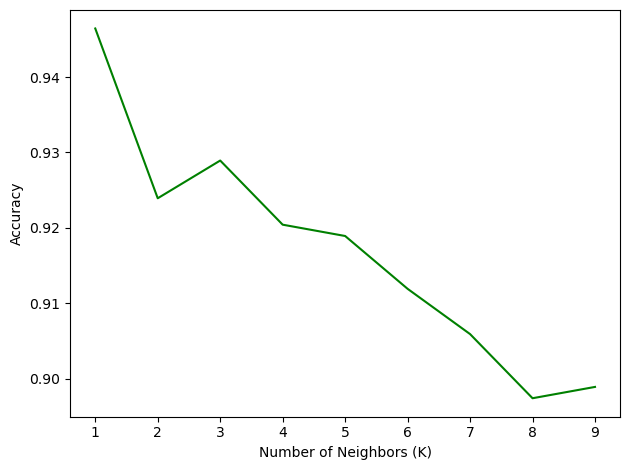

In [27]:
# KNN visualization
# 가장 정확도가 높은 k값 도출, k=1
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9464464464464465 with k= 1


In [29]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, yhat)

array([[186,   0,   7,   1,   1,   6,   0,   0,   4,   3],
       [  0, 198,   0,   0,   0,   5,   0,   0,   0,   0],
       [  0,   1, 165,   3,   0,   5,   0,   1,   5,   6],
       [  2,   4,   2, 180,   2,   1,   0,   0,   3,   5],
       [  6,   0,   7,   1, 193,   0,   2,   6,   1,   2],
       [  0,  17,   7,   1,   0, 166,   0,   0,   1,   0],
       [  0,   0,   0,   3,   1,   0, 193,   0,   1,   6],
       [  0,   0,   4,   0,   5,   1,   0, 166,   3,   1],
       [  1,   1,   6,   3,   4,   0,   1,   3, 191,   1],
       [  6,   1,   6,  10,   3,   1,   4,   0,   8, 158]])

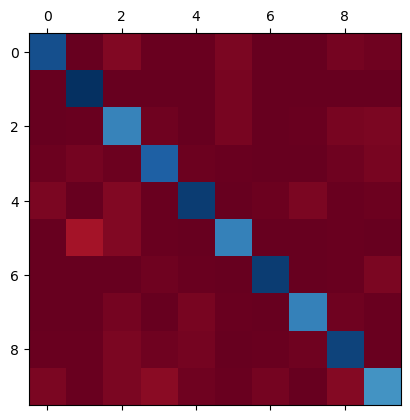

In [30]:
cmf = confusion_matrix(y_test, yhat)
plt.matshow(cmf, cmap=plt.cm.RdBu)
plt.show()